# Interpolation polynomiale - Étude du phénomène de Runge
## Fichier de correction
### Alban Gossard (gossard@insa-toulouse.fr)

### Importation de packages pour Python

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as npl

## Retour sur le phénomène de Runge

On a vu dans le cours le phénomène de Runge qui se traduit par une mauvaise interpolation, lorsque l'on augmente le degré du polynôme d'interpolation de Lagrange, de la fonction $f$ définie sur $\mathbb{R}$ par
$$
f(x) = \dfrac{1}{1+x^2}.
$$
Le but du TP est d'observer ce phénomène mais aussi de mettre en oeuvre une meilleure répartition des points d'interpolation à l'aide des racines des polynômes de Chebyshev et de constater l'atténuation du phénomène de Runge. Plus particulièrement, vous implémenterez des fonctions permettant de calculer le polynôme d'interpolation de Lagrange par la méthode directe, celle de Lagrange et celle de Newton. On verra l'intérêt d'utiliser la méthode de Newton lorsque l'on désire ajouter un point d'interpolation.

### Fonction de Runge

>**À faire :** Implémenter une fonction **Runge** qui à chaque un vecteur $x$ sous format numpy retourne le vecteur $f(x)$. Puis, tracer de cette fonction sur l'intervalle $[-3,3]$.

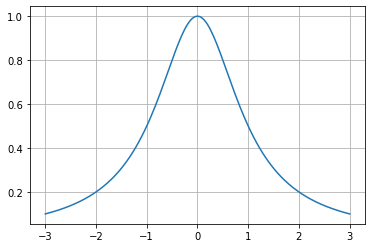

In [2]:
def Runge(x):
    # x: scalaire ou vecteur de valeurs où l'on souhaite calculer la valeur de la fonction
    return 1./(1.+x**2.)
x=np.linspace(-3,3,200)
plt.plot(x,Runge(x))
plt.grid(True)
plt.savefig('Diapo TP3/fct_a_interp.png')
plt.show()

### Construction de points d'interpolation équirépartis

Dans un premier temps, nous allons considérer des points d'interpolation uniformément répartis sur l'intervalle d'interpolation $[a,b]$, $a<b$. L'ensemble des points d'interpolation $(x_j)_{0\leq j\leq n}$ va donc être donné, pour un certain $n\geq 1$, par
$$ x_j = a + (b-a)\frac j n, \quad 0\leq j\leq n.$$


>**À faire :** Implémenter une fonction **Interp_Equi** qui prend en arguments d'entrée les valeurs $a$ et $b$ (qui définissent l'intervalle d'interpolation) ainsi que $m$ de manière à retourner un vecteur $x$ de $m$ points d'interpolations équirépartis sur $[a,b]$. 

In [3]:
def Interp_Equi(a,b,m):
    # Génère n points d'interpolation tels que pour 1<=j<=n, x_j=a+(b-a)*j/n
    # a: point de départ
    # b: dernier point
    # n: nombre de points
    # Le premier point correspond à a et le dernier correspond à b.
    return np.linspace(a,b,m)
print(Interp_Equi(0,1,5))

[0.   0.25 0.5  0.75 1.  ]


### Méthode directe de construction d'un polynôme d'interpolation

On rappelle que la méthode directe de construction consiste à simplement poser le système d'équations suivant
$$ p(x_j) = y_j, \quad 0\leq j\leq n,$$
sous la forme d'un système linéaire dont la solution correspond au vecteur $(a_j)_{0\leq j\leq n}$ de coefficients du polynôme d'interpolation. Plus précisément, le système s'écrit
$$ \left[ 
\begin{array}{ccccc}
1 & x_0 & \cdots & x_0^{n-1} & x_0^n \\ 
1  & x_1 & \cdots & x_1^{n-1}  & x_1^n \\ 
\vdots & \vdots &  & & \vdots \\ 
1 & x_n & \cdots & x_{n}^{n-1} & x_{n}^n
\end{array}
\right]\left[\begin{array}{c}a_0\\ a_1\\ \vdots \\ a_n \end{array}\right] = \left[\begin{array}{c}y_0\\ y_1\\ \vdots \\ y_n \end{array}\right].
 $$
 
 >**À faire :** Implémenter une fonction **Vandermonde** qui prend en arguments d'entrée un vecteur $x$ de points d'interpolation et qui rend, en sortie, la matrice de Vandermonde associée au système linéaire précédent. 

In [4]:
def Vandermonde(x):
    # Renvoie une matrice de Vendermonde de taille n x n
    # x: points d'interpolation
    # Chaque élément de la matrice est défini par M[j,i]=x[j]^i
    # Deux possibilité pour l'implémenter :
    #  - faire une boucle en i puis une boucle en j
    #  - faire une seule boucle (comme ci-dessous) et remplir les colonnes une par une en vectoriel
    n=x.shape[0]
    M=np.zeros((n,n))
    for i in range(n):
        M[:,i]=x**i
    return M
x=Interp_Equi(0,1,5)
print(x)
print(Vandermonde(x))

[0.   0.25 0.5  0.75 1.  ]
[[1.         0.         0.         0.         0.        ]
 [1.         0.25       0.0625     0.015625   0.00390625]
 [1.         0.5        0.25       0.125      0.0625    ]
 [1.         0.75       0.5625     0.421875   0.31640625]
 [1.         1.         1.         1.         1.        ]]


 >**À faire :** À l'aide de la fonction **npl.solve**, implémenter une fonction **Methode_directe** qui prend en argument les points d'interpolations $x$ ainsi qu'une fonction $f$ à interpoler et qui rend en sortie un vecteur $a$ qui contient les coefficients du polynôme d'interpolation de $f$ aux points $x$.

In [5]:
def Methode_directe(x,f):
    # Renvoie les coefficients d'interpolation a obtenus par la résolution du système linéaire
    # x: points d'interpolation
    # f: fonction à interpoler
    # Attention: f est une fonction Python, il faut donc l'appeler, par exemple f(1). Ce n'est pas un array, donc ne pas faire f[1].
    # Il faut d'abord calculer M la matrice de Vandermonde et ensuite résoudre M a = f(x)
    M=Vandermonde(x)
    a=npl.solve(M,f(x))
    return a
x_interp=Interp_Equi(0,1,5)
print(x_interp)
print(Methode_directe(x_interp,Runge))

[0.   0.25 0.5  0.75 1.  ]
[ 1.          0.03882353 -1.34823529  1.07294118 -0.26352941]


 >**À faire :** Grâce aux fonctions **PtsInterp_Equi** et **Methode_directe**, tracer sur une même figure la fonction **Runge** sur l'intervalle $[-3,3]$ ainsi que son polynôme d'interpolation pour $5$, $10$ et $15$ points d'interpolation.

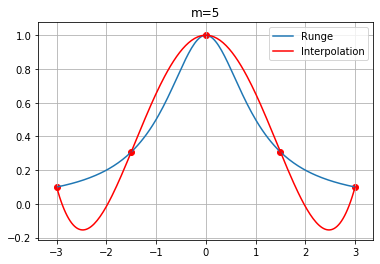

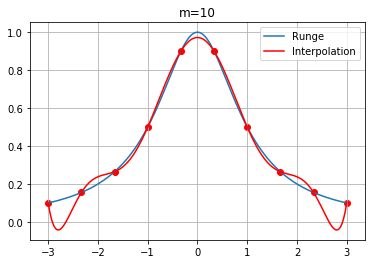

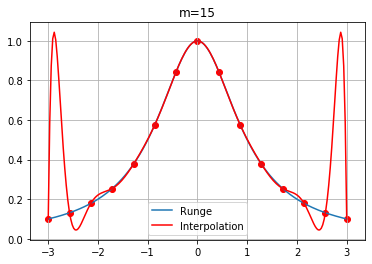

In [6]:
def Evaluer(x_eval, a):
    # Evalue l'interpolation aux points d'évaluation x_eval de la fonction interpolante définie par les coefficients a
    # Pour chaque point d'évaluation x_i, l'interpolation y_i se calcule avec la formule y_i = somme(k=0..n_interp-1) a[k] * x_i^k
    # x_eval: points d'évaluation (à ne pas confondre avec les points d'interpolation, ils sont complètement différents !)
    # a: coefficients d'interpolation
    y = np.zeros_like(x_eval)
    for k in range(a.shape[0]):
        y+=a[k]*x_eval**k
    return y

a,b=-3,3
list_m=[5,10,15]
for m in list_m:
    x_interp=Interp_Equi(a,b,m) # points d'interpolation
    coeffs=Methode_directe(x_interp,Runge) # on calcule les coefficients a
    x_eval=np.linspace(a,b,200) # points d'évaluation du polynôme d'interpolation (différents de ceux d'interpolation)
    eval_interp = Evaluer(x_eval, coeffs) # on calcule les valeurs du polynôme d'interpolation aux points d'évaluation
    plt.plot(x_eval,Runge(x_eval),label='Runge')
    plt.plot(x_eval, eval_interp, color='red', label='Interpolation')
    # on affiche l'évaluation de l'interpolation aux points d'évaluation
    # si on a bien travaillé ces points doivent être sur la fonction de Runge
    plt.scatter(x_interp,Vandermonde(x_interp).dot(coeffs),color='red')
    plt.title("m="+str(m))
    plt.legend()
    plt.grid(True)
    plt.savefig("Diapo TP3/methode_directe_m="+str(m)+".png",dpi=300)
    plt.show()

### Méthode de Lagrange

Nous avons vu dans le cours que le polynôme d'interpolation de Lagrange peut être calculé par la méthode de Lagrange. Cette méthode consiste à trouver une base de polynômes, qui sont les polynômes de Lagrange, dans laquelle on exprime le polynôme d'interpolation. Étant donné une fonction $f$ et un ensemble $(x_j)_{0\leq j\leq n}$ de points d'interpolation, le polynôme d'interpolation $p$ s'exprime comme
$$
p(x) = \sum_{j = 0}^{n} f(x_j) L_{j,n}(x), \quad \forall x \in \mathbb{R},
$$
avec $(L_{j,n})_{0\leq j\leq n}$ la base de polynôme de Lagrange donnée par
$$
L_{j,n}(x) = \prod_{\substack{k = 0\\k\neq j}}^{n} \dfrac{x-x_k}{x_j-x_k}.
$$

 >**À faire :** Écrire une fonction **Methode_Lagrange** qui implémente la méthode précédente avec en arguments d'entrée un vecteur $x\_interp$ de points d'interpolation et un vecteur $x$ de points d'abscisse. Cette fonction returnera la matrice $L$ dont chaque colonne correspond au vecteur $\ell_i = L_{i,n}(x)$. 
 
On obtient alors le vecteur  $y = p(x)$ grâce au produit matrice-vecteur $y = Lz$ où $z = f(x\_interp)$. Le produit matrice-vecteur peut se faire grâce à la fonction **np.dot**.

In [7]:
def Methode_Lagrange(x_interp,x_eval):
    # Renvoie la matrice L de taille m x n définie par L[j,i] = produit(k=0..n-1 et k!=i) (x_eval[j]-x_interp[k])/(x_interp[i]-x_interp[k])
    # x_interp: points d'interpolation, array de taille n
    # x_eval: points d'évaluation, array de taille m
    # Ici aussi deux possibilités pour l'implémenter :
    #  - faire trois boucles en i, en j et en k puis multiplier les éléments entre eux
    #  - faire seulement deux boucles (comme ici) et remplir les colonnes en vectoriel
    n=x_interp.shape[0]
    m=x_eval.shape[0]
    L=np.ones((m,n))
    for i in range(n):
        for k in range(n):
            if k!=i:
                L[:,i]*=(x_eval-x_interp[k])/(x_interp[i]-x_interp[k])
    return L
x_interp=Interp_Equi(0,1,3)
x_eval=np.linspace(a,b,20)
print(Methode_Lagrange(x_interp, x_eval))

[[ 2.80000000e+01 -4.80000000e+01  2.10000000e+01]
 [ 2.34626039e+01 -3.95567867e+01  1.70941828e+01]
 [ 1.93240997e+01 -3.19113573e+01  1.35872576e+01]
 [ 1.55844875e+01 -2.50637119e+01  1.04792244e+01]
 [ 1.22437673e+01 -1.90138504e+01  7.77008310e+00]
 [ 9.30193906e+00 -1.37617729e+01  5.45983380e+00]
 [ 6.75900277e+00 -9.30747922e+00  3.54847645e+00]
 [ 4.61495845e+00 -5.65096953e+00  2.03601108e+00]
 [ 2.86980609e+00 -2.79224377e+00  9.22437673e-01]
 [ 1.52354571e+00 -7.31301939e-01  2.07756233e-01]
 [ 5.76177285e-01  5.31855956e-01 -1.08033241e-01]
 [ 2.77008310e-02  9.97229917e-01 -2.49307479e-02]
 [-1.21883657e-01  6.64819945e-01  4.57063712e-01]
 [ 1.27423823e-01 -4.65373961e-01  1.33795014e+00]
 [ 7.75623269e-01 -2.39335180e+00  2.61772853e+00]
 [ 1.82271468e+00 -5.11911357e+00  4.29639889e+00]
 [ 3.26869806e+00 -8.64265928e+00  6.37396122e+00]
 [ 5.11357341e+00 -1.29639889e+01  8.85041551e+00]
 [ 7.35734072e+00 -1.80831025e+01  1.17257618e+01]
 [ 1.00000000e+01 -2.40000000e+

 >**À faire :** Tracer ensuite sur une même figure la fonction **Runge** sur l'intervalle $[-3,3]$ ainsi que son polynôme d'interpolation obtenue avec la méthode de Lagrange pour $5$, $10$ et $15$ points d'interpolation.

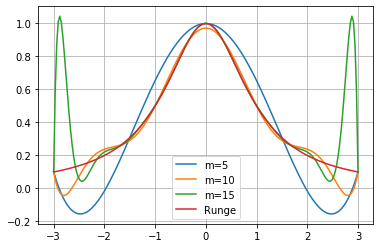

In [8]:
list_m=[5,10,15]
x_eval=np.linspace(a,b,200)
for m in list_m:
    x_interp=Interp_Equi(a,b,m)
    L=Methode_Lagrange(x_interp,x_eval)
    z=Runge(x_interp)
    y=L.dot(z)
    plt.plot(x_eval,y,label='m='+str(m))
plt.plot(x_eval,Runge(x_eval),label='Runge')
plt.legend()
plt.grid(True)
plt.savefig("Diapo TP3/Lagrange.png",dpi=300)
plt.show()

### Méthode de Newton

La méthode de Newton, comme pour celle de Lagrange, permet d'exprimer le polynôme d'interpolation de Lagrange dans une base de polynômes, qui sont les polynômes de Newton. Étant donné une fonction $f$ et un ensemble $(x_j)_{0\leq j\leq n}$ de points d'interpolation, le polynôme d'interpolation $p$ s'exprime comme
$$
p(x) = \sum_{j = 0}^{n} z_j N_{j,n}(x), \quad \forall x \in \mathbb{R},
$$
avec $(N_{j,n})_{0\leq j\leq n}$ la base de polynôme de Newton donnée par
$$
N_{j,n}(x) = \prod_{k = 0}^{j} (x-x_k),
$$
et $(z_j)_{0\leq j\leq n}$ les coefficients qui sont solution du système triangulaire
$$
\left[ 
\begin{array}{cccccc}
1 & 0 & 0  &  \cdots & 0 \\ 
1  & (x_1-x_0) & 0  & \cdots   & 0 \\ 
1  & (x_2-x_0) & (x_2-x_0)(x_2-x_1) & \ddots   & \vdots \\ 
\vdots & \vdots &  \vdots  & \ddots & 0 \\ 
1 & (x_n-x_0) &  (x_n-x_0)(x_n-x_1) & \cdots & \prod_{j = 0}^{n-1}(x_n-x_j)
\end{array}
\right]\left[\begin{array}{c}z_0\\ z_1\\ \vdots \\ z_n \end{array}\right] = \left[\begin{array}{c}y_0\\ y_1\\ \vdots \\ y_n \end{array}\right].
$$

 >**À faire :** Écrire une fonction **Methode_Newton** qui implémente la méthode précédente avec en arguments d'entrée un vecteur $x\_interp$ de points d'interpolation et un vecteur $x$ de points d'abscisse. Cette fonction returnera la matrice $N$ dont chaque colonne correspond au vecteur $n_i = N_{i,n}(x)$. 

In [9]:
def Methode_Newton(x_interp, x_eval):
    # Renvoie la matrice N de taille m x n définie par N[i,j] = produit(k=0..j-1) x_eval[i]-x_interp[k]
    # x_interp: points d'interpolation, array de taille n
    # x_eval: points d'évaluation, array de taille m
    # Encore une fois il est possible de remplir la matrice de différentes manières (cf fonctions précédentes)
    n=x_interp.shape[0]
    m=x_eval.shape[0]
    N=np.ones((m,n))
    for j in range(n):
        for k in range(j):
            N[:,j]*=(x_eval-x_interp[k])
    return N
x_interp=Interp_Equi(a,b,5)
x_eval=np.linspace(a,b,20)
print('Matrice N')
print(Methode_Newton(x_interp,x_eval))

Matrice N
[[  1.           0.          -0.           0.          -0.        ]
 [  1.           0.31578947  -0.37396122   1.00379064  -4.20007136]
 [  1.           0.63157895  -0.54847645   1.29902318  -5.02516862]
 [  1.           0.94736842  -0.52354571   1.07464645  -3.81782291]
 [  1.           1.26315789  -0.29916898   0.51960927  -1.68189317]
 [  1.           1.57894737   0.12465374  -0.17713952   0.51743387]
 [  1.           1.89473684   0.74792244  -0.82665112   2.1536437 ]
 [  1.           2.21052632   1.57063712  -1.23997667   2.83889396]
 [  1.           2.52631579   2.59279778  -1.22816737   2.42401455]
 [  1.           2.84210526   3.81440443  -0.60227438   0.99850753]
 [  1.           3.15789474   5.23545706   0.82665112  -1.10945281]
 [  1.           3.47368421   6.85595568   3.24755795  -3.33302   ]
 [  1.           3.78947368   8.67590028   6.84939496  -4.86667536]
 [  1.           4.10526316  10.69529086  11.82111095  -4.66622801]
 [  1.           4.42105263  12.914127

>**À faire :** Écrire une fonction **Coeff_Newton** qui permet de calculer les coefficients $(z_j)_{0\leq j\leq n}$ en résolvant le système triangulaire inférieur par un algorithme de descente. Cette fonction prendra en entrée le vecteur $x\_interp$ des points d'interpolation ainsi que la fonction $f$ à interpoler et rendra le vecteur $z$ des coefficients.

In [10]:
# Note: le sujet ne précise pas de coder soit même l'algorithme de descente, on peut donc utiliser une fonction existante qui fait le travail pour nous !
# On pourrait utiliser la fonction numpy.linalg.solve (ici npl.solve) qui permet de résoudre le système linéaire.
# Sauf qu'on sait en plus que le système est triangulaire inféfieur, autant donc utiliser une fonction dédiée pour ça !
# Le fonction solve_triangular du module scipy.linalg permet de résoudre des systèmes triangulaires et a l'avantage d'être moins gourmande en calculs (pensons aux bébés phoque sur la banquise en Arctique).
from scipy.linalg import solve_triangular

x_interp=Interp_Equi(a,b,5)
print('Matrice du système triangulaire')
print(Methode_Newton(x_interp, x_interp))

def Coeff_Newton(x_interp,f):
    y=f(x_interp)
    mat=Methode_Newton(x_interp,x_interp)
    #z=solve_triangular(mat,y,lower=True)
    z=npl.solve(mat,y)
    # Remarque: pour des raisons d'arrondis numériques, la fonction npl.solve donne des résultats plus stables que solve_triangular
    # C'est la fonction npl.solve qui est donc utilisée dans le calcul de l'erreur à la dernière partie.
    return z
z=Coeff_Newton(x_interp, Runge)
print("z=",z)

Matrice du système triangulaire
[[  1.     0.    -0.     0.    -0.  ]
 [  1.     1.5    0.    -0.     0.  ]
 [  1.     3.     4.5    0.    -0.  ]
 [  1.     4.5   13.5   20.25   0.  ]
 [  1.     6.    27.    81.   121.5 ]]
z= [ 0.1         0.13846154  0.10769231 -0.09230769  0.03076923]


On obtient alors le vecteur  $y = p(x)$ grâce au produit matrice-vecteur $y = Lz$.

>**À faire :** Tracer ensuite sur une même figure la fonction **Runge** sur l'intervalle $[-3,3]$ ainsi que son polynôme d'interpolation obtenue avec la méthode de Newton pour $5$, $10$ et $15$ points d'interpolation.

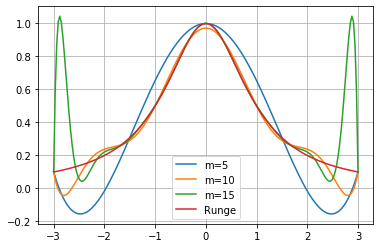

In [11]:
list_m=[5,10,15]
x_eval=np.linspace(a,b,200)
for m in list_m:
    x_interp=Interp_Equi(a,b,m)
    z=Coeff_Newton(x_interp,Runge)
    N=Methode_Newton(x_interp, x_eval)
    plt.plot(x_eval,N.dot(z),label='m='+str(m))
plt.plot(x_eval,Runge(x_eval),label='Runge')
plt.legend()
plt.grid(True)
plt.savefig("Diapo TP3/Newton.png",dpi=300)
plt.show()

### Points d'interpolation de Chebyshev

Les points de Chebyshev dans l'intervalle $[-1,1]$ sont donnés par la formule suivante
$$
y_j = \cos\left(\dfrac{2i+1}{2(n+1)}\pi\right), 
\quad 0\leq j\leq n.
$$
Afin d'adapter ces points à un intervalle $[a,b]$, on se basera sur la formule suivante
$$
x_j = \frac{a+b}2 + \frac{a-b}2 y_j,
\quad 0\leq j\leq n.
$$

>**À faire :** Implémenter une fonction **Interp_Chebyshev** qui prend en arguments d'entrée les valeurs $a$ et $b$ (qui définissent l'intervalle d'interpolation) ainsi que $m$ de manière à retourner un vecteur $x$ de $m$ points d'interpolations répartis selon les points de Chebyshev sur $[a,b]$. 

In [12]:
def Interp_Chebyshev(a,b,n):
    # Renvoie n points de Chebyschev définis par x_i=(a+b)/2+y_i(a-b)/2 avec y_i = cos(pi(2i+1)/(2n))
    # a: point de départ
    # b: dernier point
    # n: nombre de points
    # Attention: le sujet donne une formule valable uniquement pour 0<=j<=n, sauf qu'en Python les indices d'un vecteur de taille n s'arrêtent à n-1.
    # La formule de y_i est donc modifiée
    i=np.arange(n)
    y=np.cos((2*i+1)*np.pi/(2*n))
    x=(a+b)/2.+(a-b)*y/2.
    return x
a,b=-3,3
print(Interp_Chebyshev(a,b,5))

[-2.85316955e+00 -1.76335576e+00 -1.83697020e-16  1.76335576e+00
  2.85316955e+00]


>**À faire :** Tracer ensuite sur une même figure la fonction **Runge** sur l'intervalle $[-3,3]$ ainsi que son polynôme d'interpolation obtenue avec la méthode de Newton pour $5$, $10$ et $15$ points d'interpolation.

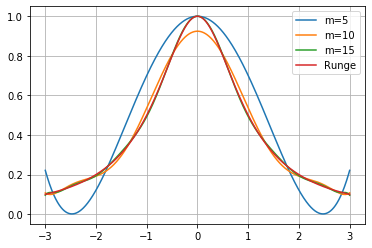

In [13]:
list_m=[5,10,15]
x_eval=np.linspace(a,b,1000)
for m in list_m:
    x=Interp_Chebyshev(a,b,m)
    z=Coeff_Newton(x,Runge)
    N=Methode_Newton(x, x_eval)
    plt.plot(x_eval,N.dot(z),label='m='+str(m))
plt.plot(x_eval,Runge(x_eval),label='Runge')
plt.legend()
plt.grid(True)
plt.savefig("Diapo TP3/chebyshev.png")
plt.show()

### Comparaison d'erreur selon la répartition des points d'interpolation

Nous sommes à présent en mesure de quantifier numériquement la réduction de l'erreur qu'apporte la répartition suivant les points de Chebyshev en comparaison avec les points équirépartis. On introduit pour cela l'erreur
$$
e(n) = \sup_{x\in[-3,3]} |f(x) - p(x)|,
$$
où $f$ est la fonction à interpoler et $p$ est le polynôme d'interpolation de Lagrange de degré $n$. On veut comparer l'évolution de l'erreur en fonction de $n$ et du choix de la répartition des points d'interpolation.

>**À faire :** Écrire une fonction **Erreur_Interp** permettant de calculer l'erreur $e(n)$ dans le cas de points d'interpolation équirépartis et le cas des points de Chebyshev. Cette fonction prendra en entrée l'entier $n$ ainsi qu'un entier $p$ et donnera en sortie un scalaire correspondant à l'erreur $e(n)$ pour les points équirépartis si $p = 0$ ou pour les points de Chebyshev si $p = 1$. L'interpolation se fera à l'aide de la méthode de Newton sur l'intervalle $[-3,3]$.

In [14]:
# Note: pour calculer l'erreur maximale, définie ici par un sup, on se donne un ensemble de valeurs de x et on calcule toutes les valeurs d'erreurs.
# On prend ensuite le maximum de la valeur absolue des erreurs. Il faut que le pas entre les points soit suffisamment faible pour avoir une bonne estimation de l'erreur.
def Erreur_Interp(n,p):
    # Renvoie le maximum de l'erreur d'interpolation sur l'intervalle [-3,3]
    # Le calcul de l'erreur doit se faire avec la méthode de Newton
    # n: nombre de points d'interpolation
    # p: entier indiquant s'il faut prendre des points d'interpolation uniformément espacés ou ceux de Chebyshev
    # Il faut:
    #  - générer des points d'interpolation et des points d'évaluation ici nommés x_compare
    #  - d'abord calculer les coefficients z à l'aide de Coeff_Newton
    #  - calculer la matrice N
    #  - enfin calculer l'interpolation aux points x_compare en faisant N.dot(z)
    a,b=-3,3
    x_compare=np.linspace(a,b,2000)
    if p==0:
        x=Interp_Equi(a,b,n)
    else:
        x=Interp_Chebyshev(a,b,n)
    z=Coeff_Newton(x,Runge)
    N=Methode_Newton(x, x_compare)
    return np.max(np.abs(Runge(x_compare)-N.dot(z)))

>**À faire :** Tracer sur une même figure l'évolution de l'erreur $\log(e(n))$, en fonction de $n$, pour les points d'interpolation équirépartis et pour les points de Chebyshev de $1$ jusqu'à $100$ points.

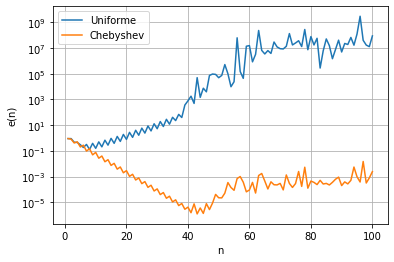

In [15]:
list_m=np.arange(1,101)
err_unif=np.zeros(list_m.shape)
err_cheb=np.zeros(list_m.shape)
for i,m in enumerate(list_m):
    err_unif[i]=Erreur_Interp(m,0)
    err_cheb[i]=Erreur_Interp(m,1)
plt.semilogy(list_m,err_unif,label='Uniforme')
plt.semilogy(list_m,err_cheb,label='Chebyshev')
plt.xlabel('n')
plt.ylabel('e(n)')
plt.legend()
plt.grid(True)
plt.savefig("Diapo TP3/erreur.png")
plt.show()